# Read a NetCDF

Here there are some piece of code to open and read a NetCDF file.

In [1]:
"""
  GNU GPL v3 License
 
  Copyright 2018 Niccolo` Tubini
 
  This program is free software: you can redistribute it and/or modify
  it under the terms of the GNU General Public License as published by
  the Free Software Foundation, either version 3 of the License, or
  (at your option) any later version.
 
  This program is distributed in the hope that it will be useful,
  but WITHOUT ANY WARRANTY; without even the implied warranty of
  MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
  GNU General Public License for more details.
 
  You should have received a copy of the GNU General Public License
  along with this program.  If not, see <http://www.gnu.org/licenses/>.
"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## to convert unix time to human readable date
import time
import datetime

from netCDF4 import Dataset

In [15]:
os.chdir("C:/Users/Niccolo/OMS/OMS_Project_Richards1D/output")
os.listdir()


['Clay_01Ponding_noRain_BottomDirichlet.nc',
 'Clay_noPonding_2mmRain_BottomImpervious.nc',
 'Clay_noPonding_4mmRain_BottomImpervious.nc',
 'Clay_noPonding_noRain_2mmBottomNeumann.nc',
 'Clay_noPonding_noRain_BottomDirichlet.nc',
 'Integrate PDE',
 'Sand_01Ponding_noRain_BottomDirichlet.nc',
 'Sand_01Ponding_noRain_BottomFreeDrainage.nc']

Create an object of type NetCDF using the function _Dataset_

In [16]:
ncfile = Dataset('Sand_01Ponding_noRain_BottomDirichlet.nc','r') 

It is possible to read file info simply running _print(ncfile)_


In [17]:
print('\n ***FILE INFO:\n')
print(ncfile)


 ***FILE INFO:

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Description_of_the_problem: 1 layer of sand 
 Grid input file: C:\Users\Niccolo\OMS\OMS_Project_Richards1D_Newest//data/Grid_NEtCDF/Sand_01Ponding.nc 
 TopBC input file: C:\Users\Niccolo\OMS\OMS_Project_Richards1D_Newest//data/Timeseries/TestAll_0.csv 
 BottomBC input file: C:\Users\Niccolo\OMS\OMS_Project_Richards1D_Newest//data/Timeseries/TestAll_0.csv, timeDelta = 10, interface k: mean
    dimensions(sizes): depth(321), dualDepth(321), time(289)
    variables(dimensions): float64 depth(depth), float64 dual_depth(dualDepth), int32 time(time), float64 psi(time,depth), float64 psiIC(depth), float64 water_heigth(time,depth), float64 velocities(time,dualDepth), float64 error(time), float64 topBC(time), float64 bottomBC(time)
    groups: 



It is possible to read some information added by whom created this file such as title, institution, summary (should contain essential description of data), and all variables stored and their type.

More informations on variables can be obtained running _ncfile.variable_. Doing so, we get:
- variable type, such as float64;
- variable unit;
- long_name of the variable describing the variable itself;
- its dimension. Usually we have unlimited dimensions since the number of time step is not assigned

In [18]:
ncfile.variables

OrderedDict([('depth', <class 'netCDF4._netCDF4.Variable'>
              float64 depth(depth)
                  units: m
                  long_name: Soil depth
              unlimited dimensions: 
              current shape = (321,)
              filling off), ('dual_depth', <class 'netCDF4._netCDF4.Variable'>
              float64 dual_depth(dualDepth)
                  units: m
                  long_name: Dual soil depth
              unlimited dimensions: 
              current shape = (321,)
              filling off), ('time', <class 'netCDF4._netCDF4.Variable'>
              int32 time(time)
                  units: unix convention
              unlimited dimensions: time
              current shape = (289,)
              filling off), ('psi', <class 'netCDF4._netCDF4.Variable'>
              float64 psi(time, depth)
                  units: m
                  long_name: Water suction
              unlimited dimensions: time
              current shape = (289, 321)
          

To store a varible contained in a NetCDF file in a python variable we can run the following line

In [19]:
ic = ncfile.variables['psiIC']

where the argument of the method varibles is the key used in the NetCDF. This can be read from the FILE INFO printed above.

Again, it is possible to read ic information just running the code below

In [20]:
print('\n ***ic INFO:\n')
print(ic)


 ***ic INFO:

<class 'netCDF4._netCDF4.Variable'>
float64 psiIC(depth)
    units: m
    long_name: Initial condition for water suction
unlimited dimensions: 
current shape = (321,)
filling off



The variable ic is of type float64, its unit is meters, it contains the intial condition for water suction, and has 321 entries.

To get its first value run

In [21]:
ic[0]

-0.0031250000000000444

In [24]:
depth = ncfile.variables['depth']
print('\n ***depht INFO:\n')
print(depth)


 ***depht INFO:

<class 'netCDF4._netCDF4.Variable'>
float64 depth(depth)
    units: m
    long_name: Soil depth
unlimited dimensions: 
current shape = (321,)
filling off



It is possible to plot the initial condition versus depth

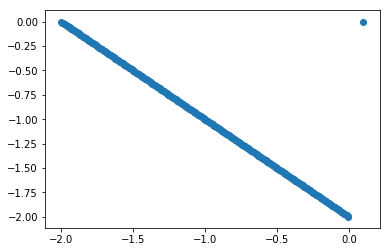

In [27]:
plt.scatter(ic[:],depth[:])
plt.show()

It is possible to add axis labels using info contained in the NetCDF file (if it is written in the proper manner)

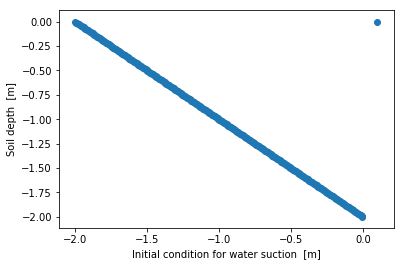

In [28]:
plt.scatter(ic[:],depth[:])
plt.xlabel(ncfile.variables['psiIC'].long_name + '  [' +ncfile.variables['psiIC'].units +']')
plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']')
plt.show()

Now let us consider the varible $\psi$

In [29]:
psi = ncfile.variables['psi']
print('\n ***depht INFO:\n')
print(psi)


 ***depht INFO:

<class 'netCDF4._netCDF4.Variable'>
float64 psi(time, depth)
    units: m
    long_name: Water suction
unlimited dimensions: time
current shape = (289, 321)
filling off



$\psi$ has both a space dimension and a time dimension: the first index identifies the time level the second one the space. 

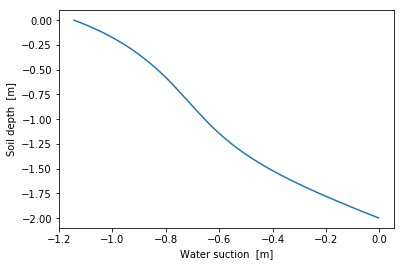

In [30]:
plt.plot(psi[0,:],depth[:])
plt.xlabel(ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']')
plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']')
plt.show()

The plot above represent the solution for $\psi$ at the first time step (in python index starts from 0 and not from 1).



But I might be interested to see how $\psi$ varies over time at the same depth. In this case the piece of code above modifies as follows

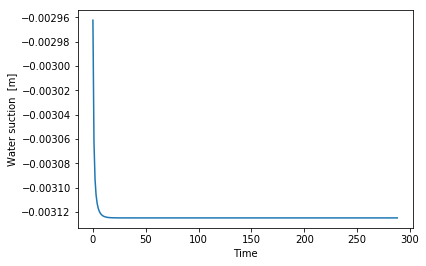

In [32]:
plt.plot(psi[:,0])
plt.ylabel(ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']')
plt.xlabel('Time')
plt.show()

To have a better plot I can create a vector of human readable dates

In [14]:
time = ncfile.variables['time']
print('\n ***TIME INFO:\n')
print(time)

dates = [datetime.datetime.fromtimestamp(t).strftime("%Y-%m-%d %H:%M") for t in time[:]]



 ***TIME INFO:

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: unix convention
unlimited dimensions: time
current shape = (577,)
filling off



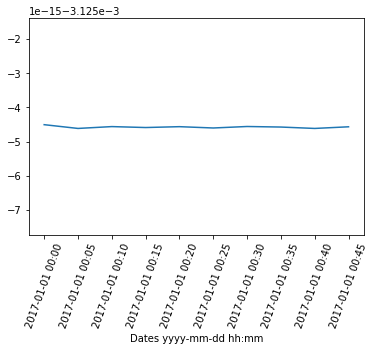

In [20]:
plt.plot(dates[0:10],psi[0:10,0])
plt.xlabel('Dates yyyy-mm-dd hh:mm')
plt.xticks(rotation=70)
plt.show()

The key _topBC_ contains the hyetograph used as top boundary condition

In [17]:
topBC = ncfile.variables['topBC']
print('\n ***TIME INFO:\n')
print(topBC)


 ***TIME INFO:

<class 'netCDF4._netCDF4.Variable'>
float64 topBC(time)
    units: mm
    long_name: rainfall heights
unlimited dimensions: time
current shape = (577,)
filling off



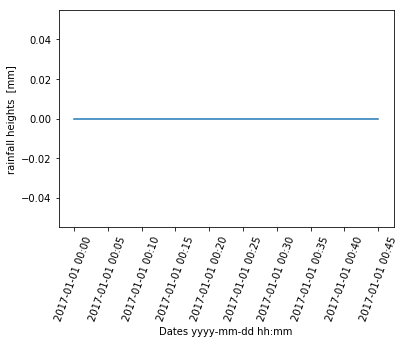

In [22]:
plt.plot(dates[0:10],topBC[0:10])
plt.xlabel('Dates yyyy-mm-dd hh:mm')
plt.ylabel(ncfile.variables['topBC'].long_name + '  [' +ncfile.variables['topBC'].units +']')
plt.xticks(rotation=70)
plt.show()

To know the cumulative rainfall height we can just run

In [23]:
np.sum(topBC[0:10])

0.0

In [7]:
ncfile.close()